https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021/version/2

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Tweets from Kaggle

## Load Data

In [1]:
  # Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials\
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link = 'https://drive.google.com/file/d/1yZz8QAIhXyeLtWxvjjvcFvhUGdtjtOMs/view?usp=sharing'

In [3]:
id = link.split("/")[-2]

In [4]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('kaggle-2010-2021.zip')

In [5]:
!unzip 'kaggle-2010-2021.zip'

Archive:  kaggle-2010-2021.zip
   creating: kaggle-2010-2021/
  inflating: __MACOSX/._kaggle-2010-2021  
  inflating: kaggle-2010-2021/2020.csv  
  inflating: __MACOSX/kaggle-2010-2021/._2020.csv  
  inflating: kaggle-2010-2021/2021.csv  
  inflating: __MACOSX/kaggle-2010-2021/._2021.csv  
  inflating: kaggle-2010-2021/2019.csv  
  inflating: __MACOSX/kaggle-2010-2021/._2019.csv  
  inflating: kaggle-2010-2021/2018.csv  
  inflating: __MACOSX/kaggle-2010-2021/._2018.csv  
  inflating: kaggle-2010-2021/2015.csv  
  inflating: __MACOSX/kaggle-2010-2021/._2015.csv  
  inflating: kaggle-2010-2021/2014.csv  
  inflating: __MACOSX/kaggle-2010-2021/._2014.csv  
  inflating: kaggle-2010-2021/2016.csv  
  inflating: __MACOSX/kaggle-2010-2021/._2016.csv  
  inflating: kaggle-2010-2021/2017.csv  
  inflating: __MACOSX/kaggle-2010-2021/._2017.csv  
  inflating: kaggle-2010-2021/2013.csv  
  inflating: __MACOSX/kaggle-2010-2021/._2013.csv  
  inflating: kaggle-2010-2021/2012.csv  
  inflating: __MA

In [44]:
#function to index and clean Elon musk tweet data in 
#folder kaggle-2010-2021

#year: str, no spaces
#possible years: [2010 - 2021]

def get_yearly_elon_tweets(year):
  
  #define file path
  path_a = '/content/kaggle-2010-2021/'
  path_b = year
  path_c = '.csv'
  path = path_a + path_b + path_c

  #read data
  df = pd.read_csv(path, parse_dates=['date'])
  
  #index with date (no hourly)
  df.index = pd.DatetimeIndex(df['date']).floor('D')
  
  #data cleaning, only tweets in coresponding year
  start_date = year + '0101' 
  end_date = year + '1231' 
  query_str = start_date + ' <= date <= ' + end_date
  df = df.query(query_str)
  return(df)


In [101]:
df_2017 = get_yearly_elon_tweets('2017')
df_2018 = get_yearly_elon_tweets('2018')
df_2019 = get_yearly_elon_tweets('2019')
df_2020 = get_yearly_elon_tweets('2020')
df_2021 = get_yearly_elon_tweets('2021')

In [102]:
elon_df = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021], axis=0)

In [103]:
#extract column of interest, nlikes
my_elon_df = pd.concat([elon_df['nlikes']], names=['nlikes'], axis=1)

In [104]:
#average daily number of likes 
avg_daily_nan_df = my_elon_df.resample('D').mean()

In [105]:
#reindex for all dates in the year 
all_dates = pd.date_range(start='1/1/2017', end='12/31/2021')

In [106]:
#for days with no tweets, fill with missing value, (np.NaN is default)
avg_daily_nan_df = avg_daily_nan_df.reindex(all_dates)

In [107]:
#what percentage are missing values?
nan_perc = avg_daily_nan_df.isna().sum() / avg_daily_nan_df.isna().count()
print("Elon did not tweet on {:.1f}% of days in 2017-2021".format(
    nan_perc.nlikes*100))

Elon did not tweet on 29.9% of days in 2017-2021


In [108]:
avg_daily_zero_df = avg_daily_nan_df.copy()

In [109]:
#fill missing values with zero
avg_daily_zero_df.fillna(0)

,nlikes
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,14041.0
...,...
2021-12-27,0.0
2021-12-28,0.0
2021-12-29,0.0
2021-12-30,0.0


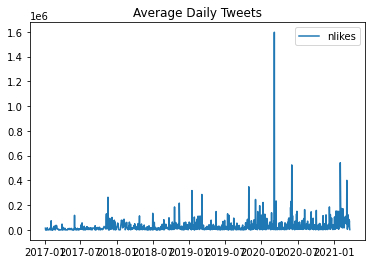

In [127]:
sns.lineplot(data=avg_daily_zero_df)
plt.title('Average Daily Tweets')
plt.show()

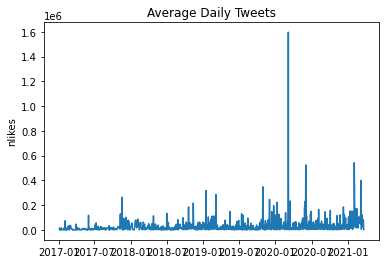

In [110]:
sns.lineplot(data=avg_daily_zero_df, x=avg_daily_zero_df.index, y='nlikes')
plt.title('Average Daily Tweets')
plt.show()

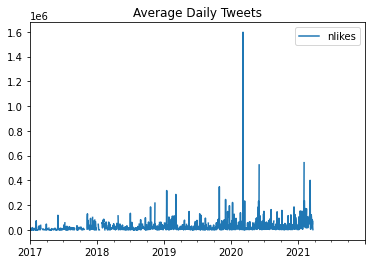

In [124]:
avg_daily_zero_df.plot()
plt.title('Average Daily Tweets')
plt.show()

## Tweet fun

Most popular tweet:

In [120]:
max_likes = elon_df['nlikes'].max()
max_likes_date = elon_df['nlikes'].idxmax()
max_likes_tweet = elon_df.loc['2020-03-06']['tweet'][0]

In [121]:
print("Elon's most liked tweet was on {} with {} likes. \nIt reads: '{}'.".format(max_likes_date, max_likes, max_likes_tweet))

Elon's most liked tweet was on 2020-03-06 00:00:00 with 1596525 likes. 
It reads: 'The coronavirus panic is dumb'.
